# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [21]:
# A) JÁ VIMOS QUE EXPRESSAR OS DADOS ATRAVÉS DA MÉDIA E DIFERENÇA É UMA TRANSFORMAÇÃO LINEAR. 
# OBTENHA A MÉDIA E A DIFERENÇA ATRAVÉS DE UMA MULTIPLICAÇÃO MATRICIAL, CONFORME VISTO EM AULA.

# Matriz de transformação para média e diferença
T = np.array([[0.5, 0.5], [0.5, -0.5]])

# Aplicando a transformação aos dados p1 e p2
transformed_data = np.dot(df.values, T)

# Criando um DataFrame para os dados transformados
df_transformed = pd.DataFrame(transformed_data, columns=['media', 'diferenca'])

# B) CALCULE A CORRELAÇÃO ENTRE OS DADOS DA P1 E P2

correlation_original = df.corr()
print("CORRELAÇÃO ENTRE p1 E p2:")
print(correlation_original)
print()

# C) CALCULANDO A CORRELAÇÃO ENTRE OS DADOS TRANSFORMADOS (MÉDIA E DIFERENÇA)

correlation_transformed = df_transformed.corr()
print("CORRELAÇÃO ENTRE DADOS TRANSFORMADOS (MÉDIA E DIFERENÇA):")
print(correlation_transformed)

CORRELAÇÃO ENTRE p1 E p2:
          p1        p2
p1  1.000000  0.895737
p2  0.895737  1.000000

CORRELAÇÃO ENTRE DADOS TRANSFORMADOS (MÉDIA E DIFERENÇA):
              media  diferenca
media      1.000000  -0.133474
diferenca -0.133474   1.000000


> d) Comente as correlações observadas.

* A correlação original entre p1 e p2 é fortemente positiva com cerca de 0,896, isso indica que alunos com boas notas em p1 tendem a ter boas notas em p2, já quando transformamos os dados em média e diferença a correlação se reduz a próximo de zero, em torno de -0,133, o que indica que a transformação linear reduz a relação entre as notas médias e as diferenças, sendo estes novos dados menos correlacionados.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

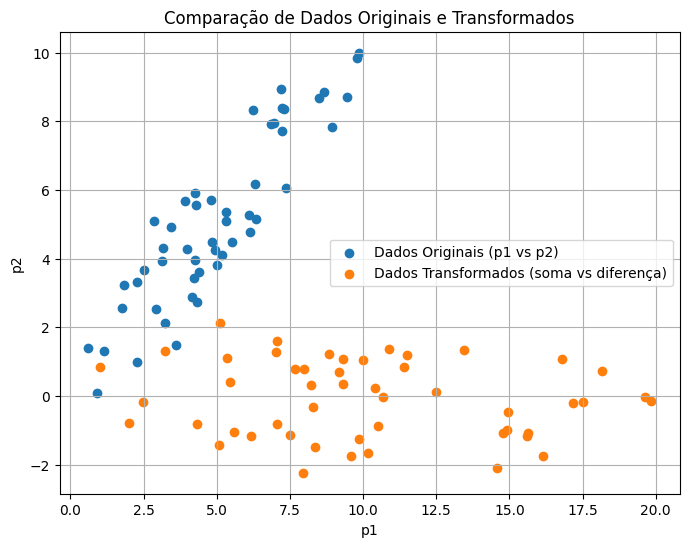

In [26]:
# Matriz de transformação para soma e diferença
T_sum_diff = np.array([[1, 1], [1, -1]])

# Aplicando a transformação às notas p1 e p2
transformed_sum_diff = np.dot(df.values, T_sum_diff)

# Criando um DataFrame para as notas transformadas (soma e diferença)
df_transformed_sum_diff = pd.DataFrame(transformed_sum_diff, columns=['soma', 'diferenca'])

# Construindo o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['p1'], df['p2'], label='Dados Originais (p1 vs p2)')
plt.scatter(df_transformed_sum_diff['soma'], df_transformed_sum_diff['diferenca'], label='Dados Transformados (soma vs diferença)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Comparação de Dados Originais e Transformados')
plt.legend()
plt.grid(True)
plt.show()

> Enquanto os dados originais seguiam uma relação positiva forte, sendo uma reta inclinada para cima, os dados que foram transformados agora mostram uma relação diferente, essa transformação reflete como a alteração das variáveis de entrada, sendo soma e diferença, podem mudar drasticamente a relação entre os dados